In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_open= pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)

In [5]:
df_openfood = df_open.copy()

In [7]:
df_openfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [9]:
# Afficher les colonnes avec moins de 50% de valeurs manquantes
valeurs_manquante = df_openfood.isnull().mean() * 100 
valeurs_manquante.sort_values(ascending=False, inplace=True) 
valeurs_manquante[valeurs_manquante < 50]

fiber_100g                                 37.374210
serving_size                               34.118003
nutrition-score-uk_100g                    31.038245
nutrition-score-fr_100g                    31.038245
nutrition_grade_fr                         31.038245
saturated-fat_100g                         28.437021
carbohydrates_100g                         24.061951
fat_100g                                   23.967491
sugars_100g                                23.630803
additives                                  22.404387
additives_n                                22.393787
ingredients_from_palm_oil_n                22.393787
ingredients_that_may_be_from_palm_oil_n    22.393787
ingredients_text                           22.386617
sodium_100g                                20.359944
salt_100g                                  20.345292
proteins_100g                              18.969860
energy_100g                                18.598568
brands_tags                                 8.

In [11]:
cible = 'nutrition_grade_fr'

In [13]:
df_openfood[cible].describe()

count     221210
unique         5
top            d
freq       62763
Name: nutrition_grade_fr, dtype: object

In [15]:
# Supprimer les lignes où la cible 'nutrition_grade_fr' est manquante
df_openfood = df_openfood.dropna(subset=[cible])
df_openfood.shape

(221210, 162)

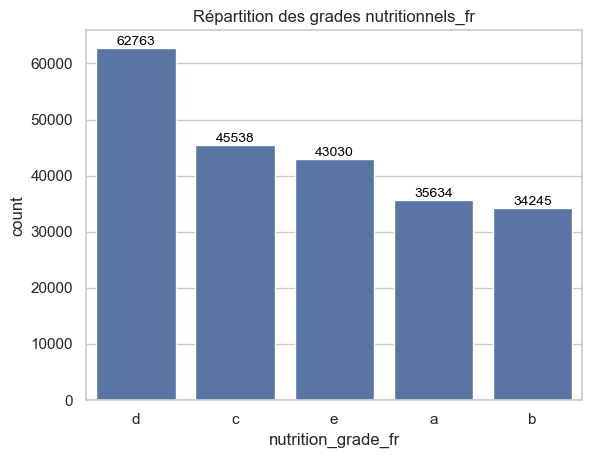

In [17]:
# j'affiche la répartition de mes valeurs ***rectifier ( valeurs juste au dessus de la barre )***
# Ajouter les valeurs au-dessus des barres
sns.set(style='whitegrid')
counts = df_openfood[cible].value_counts()
sns.countplot(data=df_openfood, x=cible, order=counts.index, hue=cible, palette="pastel")
plt.title('Répartition des grades nutritionnels_fr')
for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [19]:
# Séparez la cible du reste du dataset. varaiable cible (y) et X reste des donnée
v_cible = df_openfood[cible]
v_cible.shape

(221210,)

In [23]:
# Afficher les colonnes avec moins de 50% de valeurs manquantes dans le reste du data set
valeurs_manquante[valeurs_manquante < 70]

quantity                                   67.322896
vitamin-a_100g                             57.117828
iron_100g                                  56.211265
vitamin-c_100g                             56.085007
calcium_100g                               56.027958
trans-fat_100g                             55.327148
cholesterol_100g                           55.080244
additives_tags                             51.778834
additives_fr                               51.778834
fiber_100g                                 37.374210
serving_size                               34.118003
nutrition-score-uk_100g                    31.038245
nutrition-score-fr_100g                    31.038245
nutrition_grade_fr                         31.038245
saturated-fat_100g                         28.437021
carbohydrates_100g                         24.061951
fat_100g                                   23.967491
sugars_100g                                23.630803
additives                                  22.

In [25]:
cand_features_pertinentes = ['vitamin-a_100g','vitamin-c_100g', 'iron_100g', 'calcium_100g',
                            'trans-fat_100g', 'cholesterol_100g', 'serving_size', 'fiber_100g', 'ingredients_text', 'carbohydrates_100g',
                            'fat_100g', 'product_name', 'sodium_100g', 'salt_100g', 'energy_100g', 'sugars_100g',
                            'proteins_100g', 'saturated-fat_100g']

len(cand_features_pertinentes)

18

In [27]:
col_delete = [col for col in df_openfood if col not in cand_features_pertinentes]

In [29]:
reste_df = df_openfood.drop(columns=col_delete)

In [31]:
reste_df.shape

(221210, 18)

In [35]:
# supprimer les duplicates (les duplons)
reste_df.duplicated().sum()

4575

In [37]:
reste_df[reste_df.duplicated(keep=False)].head()

,product_name,ingredients_text,serving_size,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
354,"Emojeez, Gummies Candy, Fruit","Corn syrup, sugar, water, gelatin, dextrose, c...",40 g (17 PIECES | ABOUT),1151.0,0.00,0.00,0.0,0.0,67.50,40.00,0.0,5.00,0.03048,0.012,0.0,0.0000,0.000,0.00000
358,"Emojeez, Gummies Candy, Fruit","Corn syrup, sugar, water, gelatin, dextrose, c...",40 g (17 PIECES | ABOUT),1151.0,0.00,0.00,0.0,0.0,67.50,40.00,0.0,5.00,0.03048,0.012,0.0,0.0000,0.000,0.00000
393,Fruit Gummies,"Sugar, corn syrup, white grape juice concentra...",40 g (13 PIECES),1255.0,0.00,0.00,0.0,0.0,70.00,37.50,0.0,7.50,0.09652,0.038,0.0,0.0000,NaN,0.00000
394,Fruit Gummies,"Sugar, corn syrup, white grape juice concentra...",40 g (13 PIECES),1255.0,0.00,0.00,0.0,0.0,70.00,37.50,0.0,7.50,0.09652,0.038,0.0,0.0000,NaN,0.00000
440,Vindaloo Sauce,"Tomatoes, onions, water, canola oil, garlic, g...",118 ml (0.5 cup),427.0,6.78,0.42,0.0,0.0,9.32,4.24,1.7,1.69,1.50622,0.593,0.0,0.0051,0.017,0.00092


In [39]:
# arrive a justifier le lien entre le code et le monde réel ( logique dérrière )
reste_df.duplicated(subset=['ingredients_text']).sum()

55625

In [41]:
#considerons tous le produits qui ont les mêmes ingredients sont des doublons
# Ajoutons une colonne temporaire pour compter les valeurs non nulles dans chaque ligne (dans le but de perdre moins d'info)
reste_df = reste_df.copy()  # Assurons-nous de travailler sur une copie explicite
reste_df.loc[:, "non_null_count"] = reste_df.notnull().sum(axis=1)

# Trions le DataFrame en fonction de cette colonne
reste_df = reste_df.sort_values(by="non_null_count", ascending=False)

reste_df = reste_df.drop(columns=["non_null_count"])

# faut essayer de supprimer le moins de lignes possibles ( )


In [43]:
reste_df = reste_df.drop_duplicates(subset=['ingredients_text'], keep='first')

In [45]:
reste_df.shape

(165585, 18)

In [47]:
def automation_data(df, target, missing_per, duplicate_col=None):
    """
    Prépare les données pour l'analyse en appliquant les étapes de nettoyage.

    Parameters:
    - df (pd.DataFrame): Le DataFrame brut.
    - target (str): La colonne cible.
    - missing_per (float): Pourcentage maximal de valeurs manquantes pour conserver une colonne.
    - duplicate_col (list, optional): Colonnes pour identifier les doublons.

    Returns:
    - rest_df (pd.DataFrame): DataFrame nettoyé sans la cible.
    - v_target (pd.Series): La variable cible.
    """
    # 1 : Supprimons les colonnes avec trop de valeurs manquantes
    missing_pour100 = df.isnull().mean() * 100
    keep_col = missing_pour100[missing_pour100 < missing_per].index
    df = df[keep_col]

    # 2 : Supprimons les lignes où la variable cible est manquante
    df = df.dropna(subset=[target])

    # 3 : Séparons la variable cible
    v_target = df[target]
    rest_df = df.drop(columns=[target])

    # Étape 4 : Supprimer les doublons
    if duplicate_col is not None:
        rest_df = rest_df.copy()
        rest_df.loc[:, "non_null_count"] = reste_df.notnull().sum(axis=1)
        rest_df = rest_df.sort_values(by="non_null_count", ascending=False)
        rest_df = rest_df.drop_duplicates(subset=duplicate_col, keep="first")
        rest_df = rest_df.drop(columns=["non_null_count"])

    return rest_df, v_target

# ETAPE 2 - ETUDE DES VALEURS ABERRANTES

In [50]:
def affichage_boxplot_oulier(df, list_var):
    for column in var_numric:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=reste_df[column])
        plt.title(f'Boxplot de la varaible : {column}')
        plt.show()
        
        # Affichons les statistiques descriptives de la colonne
        print(f"Statistiques de {column}:")
        print(reste_df[column].describe())
            
        #Calcul des limites IQR
        Q1 = reste_df[column].quantile(0.25)
        Q3 = reste_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lim_1 = Q1 - 1.5 * IQR
        lim_2 = Q3 + 1.5 * IQR
        
        #print("\nValeurs potentiellement aberrantes :")
        # Identifier les valeurs au-delà des limites
        outliers = reste_df[(reste_df[column] < lim_1) | (reste_df[column] > lim_2)][column]
        print('nombre de valeur outliers :', len(outliers))
        # Si des valeurs aberrantes sont pas détectées
        if outliers.empty:
            print(f"Aucune valeur aberrante détectée dans {column}.")
        print('-' * 100)

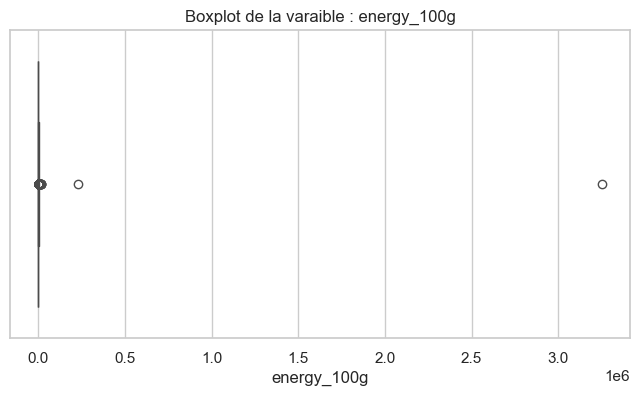

Statistiques de energy_100g:
count    1.654530e+05
mean     1.197567e+03
std      8.045423e+03
min      0.000000e+00
25%      4.810000e+02
50%      1.176000e+03
75%      1.724000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64
nombre de valeur outliers : 384
----------------------------------------------------------------------------------------------------


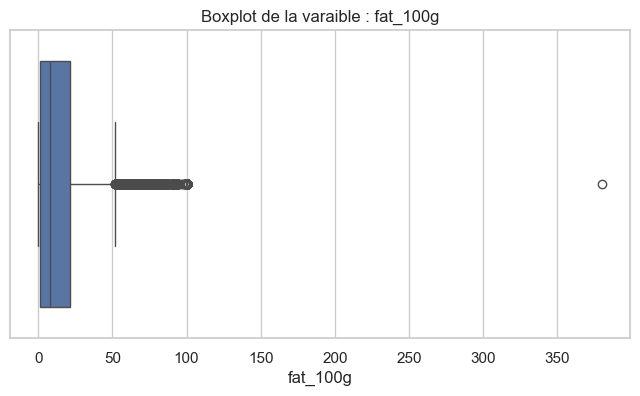

Statistiques de fat_100g:
count    164655.000000
mean         13.137323
std          15.343119
min           0.000000
25%           1.040000
50%           7.690000
75%          21.430000
max         380.000000
Name: fat_100g, dtype: float64
nombre de valeur outliers : 3701
----------------------------------------------------------------------------------------------------


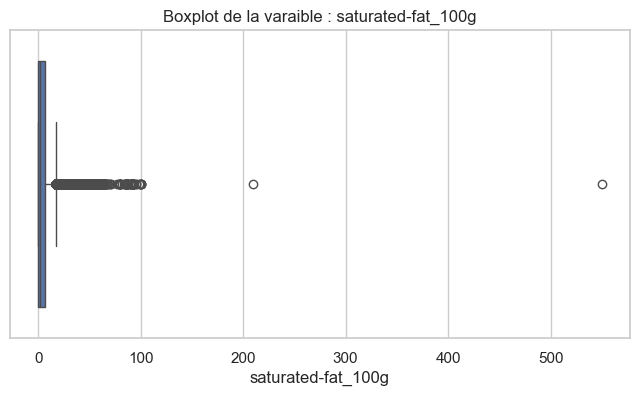

Statistiques de saturated-fat_100g:
count    165453.000000
mean          4.894473
std           7.350552
min           0.000000
25%           0.000000
50%           1.800000
75%           7.140000
max         550.000000
Name: saturated-fat_100g, dtype: float64
nombre de valeur outliers : 11253
----------------------------------------------------------------------------------------------------


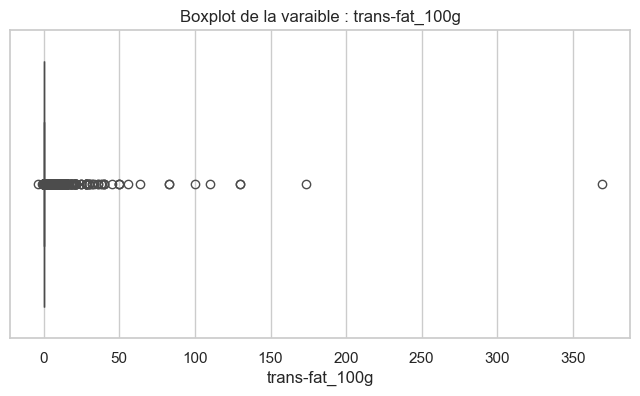

Statistiques de trans-fat_100g:
count    108685.000000
mean          0.080064
std           1.719652
min          -3.570000
25%           0.000000
50%           0.000000
75%           0.000000
max         369.000000
Name: trans-fat_100g, dtype: float64
nombre de valeur outliers : 2514
----------------------------------------------------------------------------------------------------


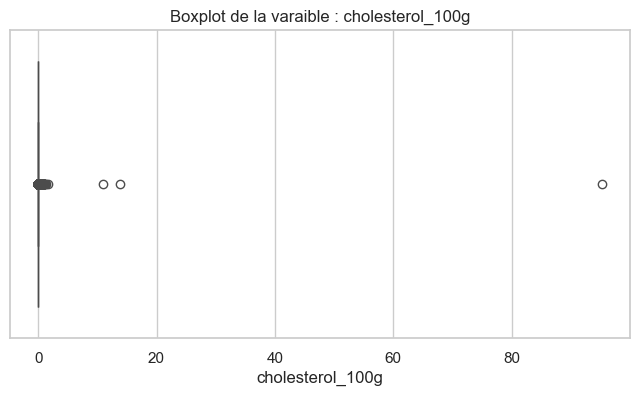

Statistiques de cholesterol_100g:
count    110264.000000
mean          0.018007
std           0.293646
min           0.000000
25%           0.000000
50%           0.000000
75%           0.020000
max          95.238000
Name: cholesterol_100g, dtype: float64
nombre de valeur outliers : 14571
----------------------------------------------------------------------------------------------------


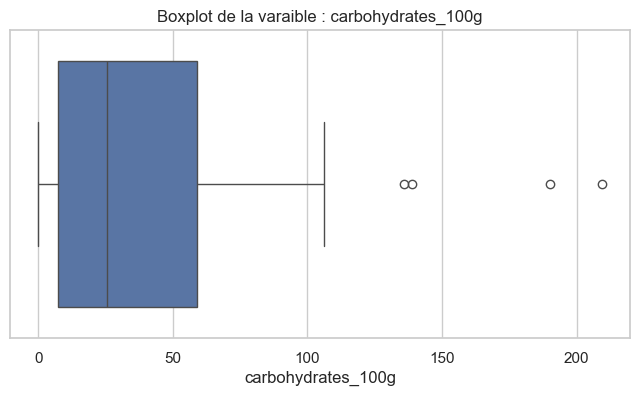

Statistiques de carbohydrates_100g:
count    164643.000000
mean         33.687483
std          27.990333
min           0.000000
25%           7.410000
50%          25.680000
75%          58.820000
max         209.380000
Name: carbohydrates_100g, dtype: float64
nombre de valeur outliers : 4
----------------------------------------------------------------------------------------------------


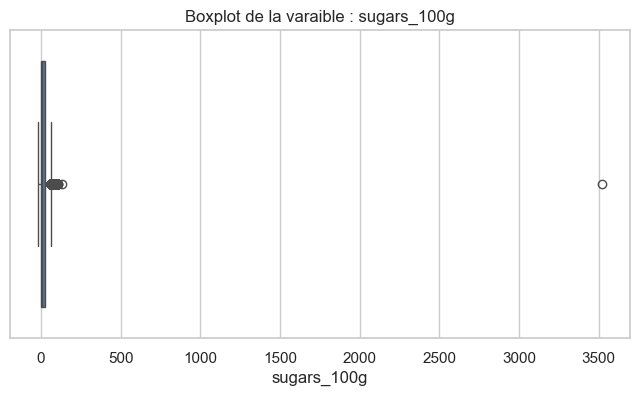

Statistiques de sugars_100g:
count    165453.000000
mean         15.615601
std          21.608108
min         -17.860000
25%           1.500000
50%           5.950000
75%          24.710000
max        3520.000000
Name: sugars_100g, dtype: float64
nombre de valeur outliers : 7428
----------------------------------------------------------------------------------------------------


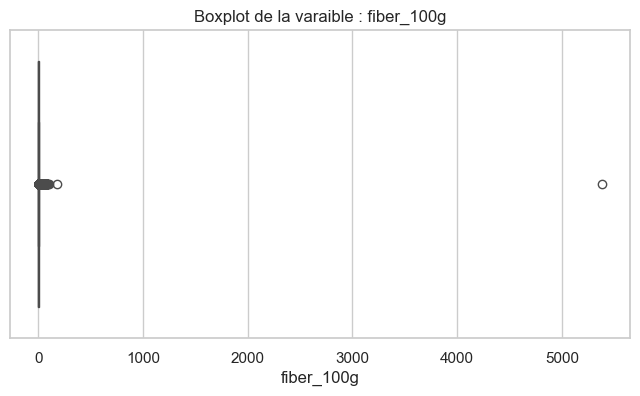

Statistiques de fiber_100g:
count    143244.000000
mean          2.830648
std          14.832167
min           0.000000
25%           0.000000
50%           1.600000
75%           3.600000
max        5380.000000
Name: fiber_100g, dtype: float64
nombre de valeur outliers : 9400
----------------------------------------------------------------------------------------------------


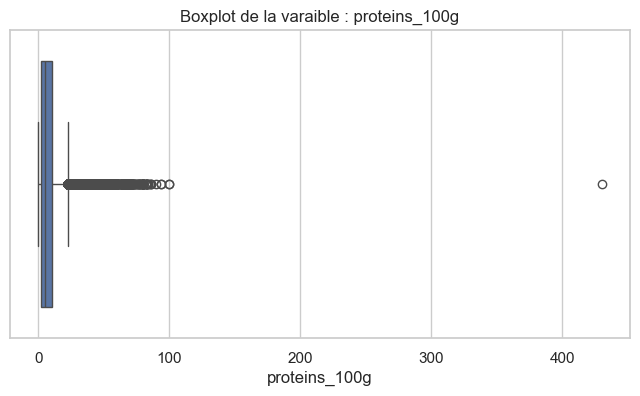

Statistiques de proteins_100g:
count    165453.000000
mean          7.511335
std           7.817117
min           0.000000
25%           2.000000
50%           5.560000
75%          10.340000
max         430.000000
Name: proteins_100g, dtype: float64
nombre de valeur outliers : 8570
----------------------------------------------------------------------------------------------------


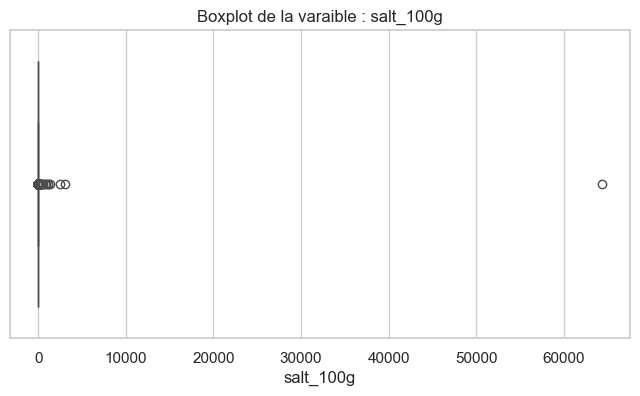

Statistiques de salt_100g:
count    165453.000000
mean          1.784791
std         158.579853
min           0.000000
25%           0.127000
50%           0.716280
75%           1.400000
max       64312.800000
Name: salt_100g, dtype: float64
nombre de valeur outliers : 9224
----------------------------------------------------------------------------------------------------


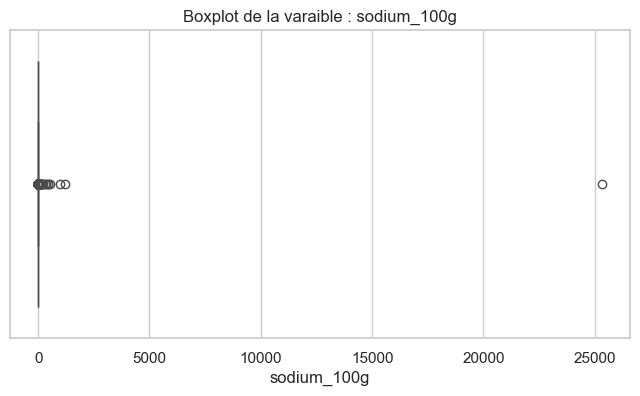

Statistiques de sodium_100g:
count    165453.000000
mean          0.702673
std          62.433012
min           0.000000
25%           0.050000
50%           0.282000
75%           0.551181
max       25320.000000
Name: sodium_100g, dtype: float64
nombre de valeur outliers : 9224
----------------------------------------------------------------------------------------------------


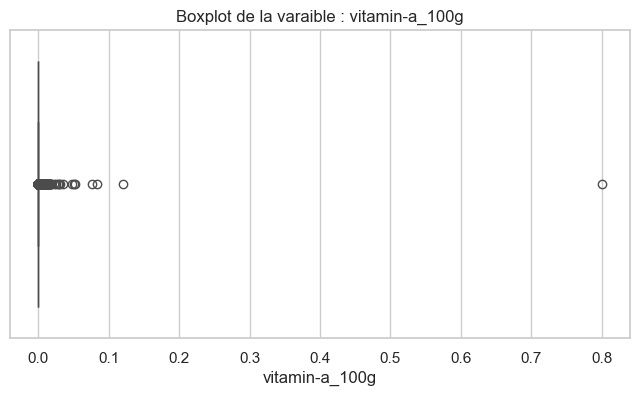

Statistiques de vitamin-a_100g:
count    106182.000000
mean          0.000145
std           0.002580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000102
max           0.800000
Name: vitamin-a_100g, dtype: float64
nombre de valeur outliers : 11991
----------------------------------------------------------------------------------------------------


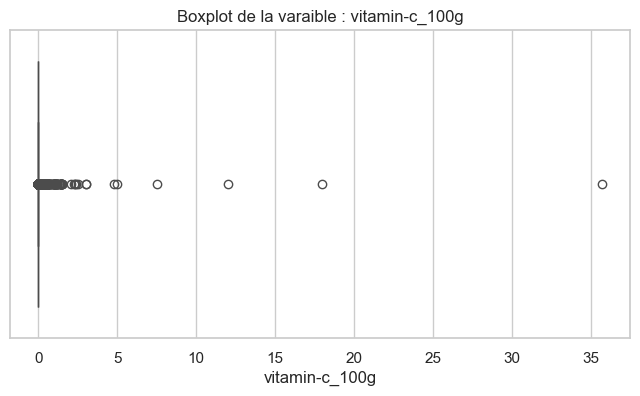

Statistiques de vitamin-c_100g:
count    106845.000000
mean          0.007392
std           0.137101
min          -0.002100
25%           0.000000
50%           0.000000
75%           0.002800
max          35.714300
Name: vitamin-c_100g, dtype: float64
nombre de valeur outliers : 17942
----------------------------------------------------------------------------------------------------


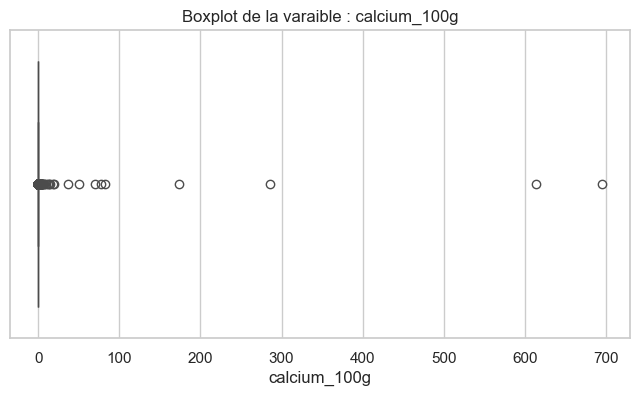

Statistiques de calcium_100g:
count    108860.000000
mean          0.108907
std           3.025717
min           0.000000
25%           0.000000
50%           0.036000
75%           0.105000
max         694.737000
Name: calcium_100g, dtype: float64
nombre de valeur outliers : 8003
----------------------------------------------------------------------------------------------------


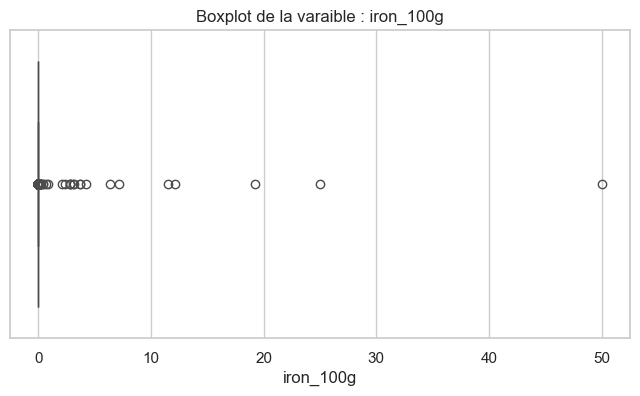

Statistiques de iron_100g:
count    108121.00000
mean          0.00335
std           0.19155
min          -0.00026
25%           0.00000
50%           0.00104
75%           0.00240
max          50.00000
Name: iron_100g, dtype: float64
nombre de valeur outliers : 4883
----------------------------------------------------------------------------------------------------


In [52]:
# Récupérer uniquement les colonnes numériques
var_numric = reste_df.select_dtypes(include=float).columns


affichage_boxplot_oulier(reste_df,var_numric)


**On rémarque deux valeurs négatives pour les variabes (trans_fat_100g, sugars_100g, iron_100g, vitamine_c) qui sont
problèmatique dans notre cas. ( et des valeurs supérieur à 100g) << idée fixée une valeur max a 80g >>**

**fixons nous une limite en 100g pour les varaible (_100g) et pour l'energie (Les huiles alimentaires figurent parmi les aliments les plus énergétiques, avec une valeur d'environ 900 kcal pour 100 g) dont prenons pour max 900 kcal = 3765,6 kj**

In [54]:
reste_df.loc[reste_df['vitamin-c_100g']==-0.002100,:]

,product_name,ingredients_text,serving_size,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
41538,Cheez Waffies,"Enriched flour (wheat flour, malted barley flo...",28 g (28 g),2092.0,28.57,21.43,0.0,0.018,50.0,17.86,0.0,7.14,2.72034,1.071,0.0,-0.0021,0.143,0.00129


In [56]:
reste_df[reste_df['vitamin-c_100g']==-0.002100] = 0

In [58]:
reste_df.loc[reste_df['sugars_100g']<0,:]

,product_name,ingredients_text,serving_size,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
117739,"Hummous, Black Truffle","Chickpeas (garbanzo beans, water, salt), fresh...",28 g (1 oz),598.0,3.57,0.00,0.0,0.0,21.43,-3.57,3.6,7.14,0.95250,0.375000,0.000000,0.0086,0.071,0.00129
164030,Organic Pumpkin Seeds,"Fresh roasted organic pumpkin seeds, sea salt.",28 g (1 oz),255.0,21.43,3.57,0.0,0.0,53.57,-17.86,17.9,17.86,1.93294,0.761000,0.000000,0.0000,0.071,0.00321
150858,"Italianavera, Tomato Sauce With Gaeta Olives &...","Diced tomato (83%), gaeta pitted black olives ...",80 g (80 g),326.0,6.25,1.25,0.0,0.0,5.00,-6.25,1.2,1.25,1.19380,0.470000,0.000188,0.0180,0.050,0.00090
18209,"Select, Spicy Red Bell Pepper Pasta Sauce","Tomatoes (diced tomatoes and tomato paste), wa...",125 g (0.5 cup),167.0,0.80,0.00,0.0,0.0,7.20,-0.80,0.8,0.80,0.87376,0.344000,NaN,NaN,NaN,NaN
195761,Caprice des dieux,"_Lait_ de vache, _crème_, sel, ferments lactiq...",NaN,1379.0,30.00,21.00,NaN,NaN,0.80,-0.10,NaN,15.30,1.40000,0.551181,NaN,NaN,0.350,NaN


In [60]:
reste_df.loc[reste_df['trans-fat_100g']==-3.570000,:]

,product_name,ingredients_text,serving_size,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
153498,Crispy Wheat Crackers,"Unbleached enriched flour (wheat flour, reduce...",28 g (28 g),1795.0,12.5,0.0,-3.57,0.0,71.43,10.71,3.6,7.14,2.44856,0.964,0.0,0.0,0.071,0.00386


In [62]:
reste_df[var_numric] = reste_df[var_numric].apply(lambda x: x.where(x >= 0, np.nan))

In [64]:
max_value_100g = 100

reste_df.loc[reste_df['energy_100g'] > 3765.6 ,  'energy_100g'] = np.nan

In [66]:
var_numric = var_numric.drop('energy_100g')

In [68]:
var_numric

Index(['fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g'],
      dtype='object')

In [70]:
reste_df[var_numric] = reste_df[var_numric].apply(lambda x: x.where(x <= max_value_100g, np.nan))

In [72]:
if not 'energy_100g' in (var_numric):
    var_numric = var_numric.append(pd.Index(['energy_100g']))

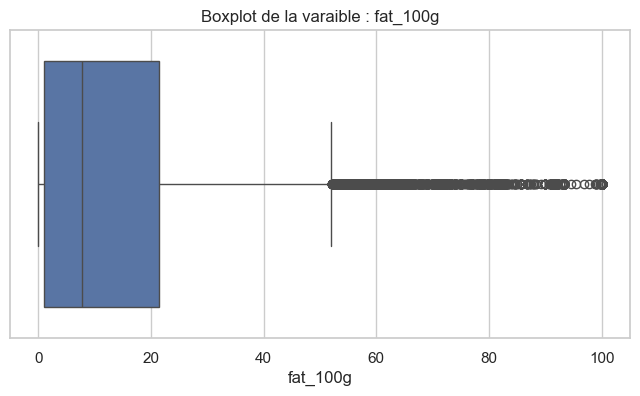

Statistiques de fat_100g:
count    164654.000000
mean         13.134922
std          15.316492
min           0.000000
25%           1.040000
50%           7.690000
75%          21.430000
max         100.000000
Name: fat_100g, dtype: float64
nombre de valeur outliers : 3700
----------------------------------------------------------------------------------------------------


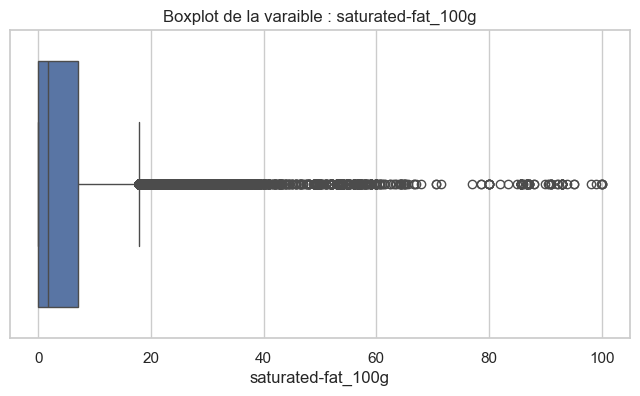

Statistiques de saturated-fat_100g:
count    165451.000000
mean          4.889809
std           7.209682
min           0.000000
25%           0.000000
50%           1.800000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64
nombre de valeur outliers : 11250
----------------------------------------------------------------------------------------------------


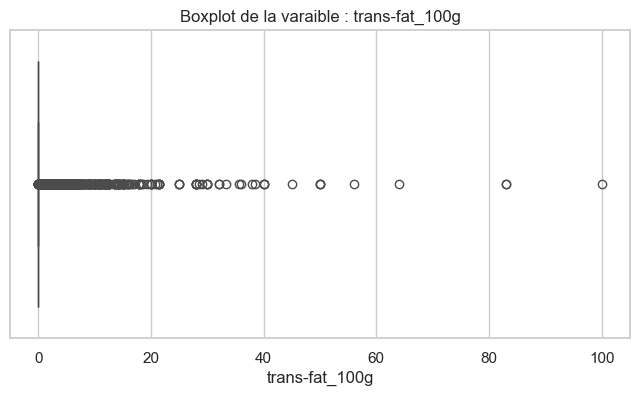

Statistiques de trans-fat_100g:
count    108677.000000
mean          0.071724
std           1.003528
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: trans-fat_100g, dtype: float64
nombre de valeur outliers : 2506
----------------------------------------------------------------------------------------------------


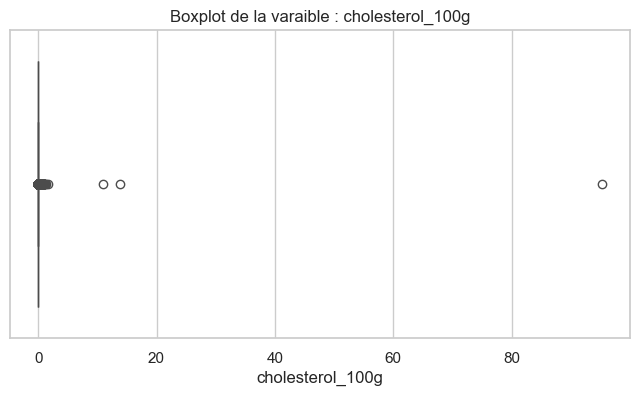

Statistiques de cholesterol_100g:
count    110264.000000
mean          0.018007
std           0.293646
min           0.000000
25%           0.000000
50%           0.000000
75%           0.020000
max          95.238000
Name: cholesterol_100g, dtype: float64
nombre de valeur outliers : 14571
----------------------------------------------------------------------------------------------------


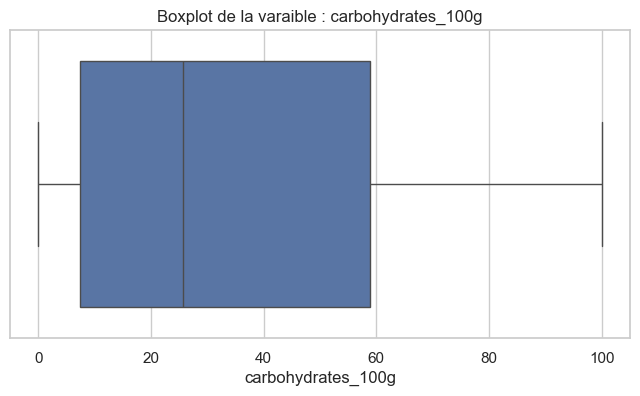

Statistiques de carbohydrates_100g:
count    164634.000000
mean         33.681779
std          27.980197
min           0.000000
25%           7.410000
50%          25.660000
75%          58.820000
max         100.000000
Name: carbohydrates_100g, dtype: float64
nombre de valeur outliers : 0
Aucune valeur aberrante détectée dans carbohydrates_100g.
----------------------------------------------------------------------------------------------------


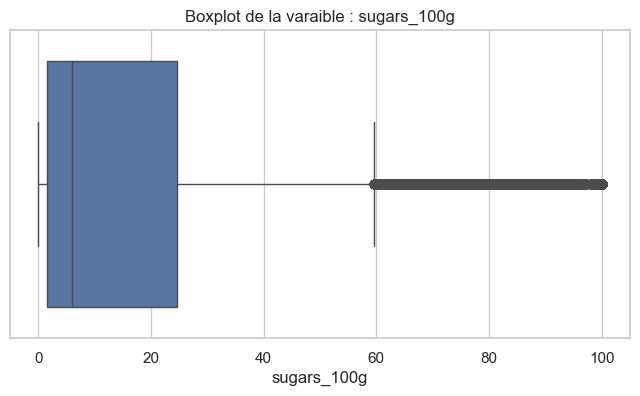

Statistiques de sugars_100g:
count    165443.000000
mean         15.592644
std          19.810842
min           0.000000
25%           1.500000
50%           5.950000
75%          24.710000
max         100.000000
Name: sugars_100g, dtype: float64
nombre de valeur outliers : 7423
----------------------------------------------------------------------------------------------------


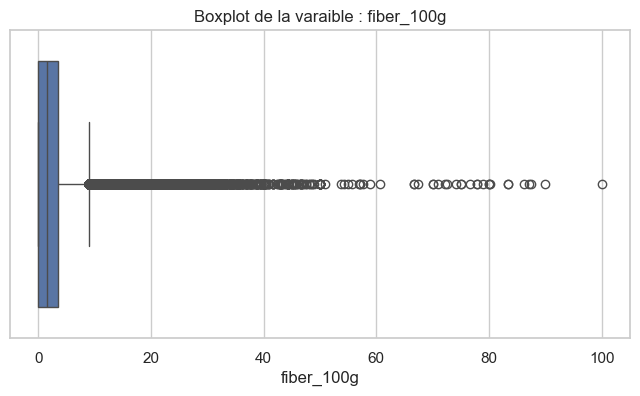

Statistiques de fiber_100g:
count    143242.000000
mean          2.791886
std           4.233823
min           0.000000
25%           0.000000
50%           1.600000
75%           3.600000
max         100.000000
Name: fiber_100g, dtype: float64
nombre de valeur outliers : 9398
----------------------------------------------------------------------------------------------------


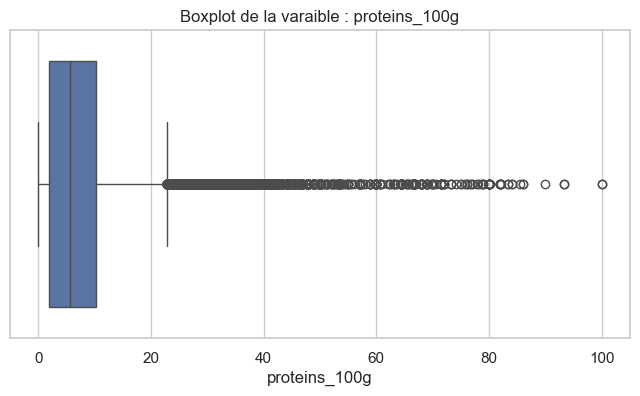

Statistiques de proteins_100g:
count    165452.000000
mean          7.508739
std           7.747849
min           0.000000
25%           2.000000
50%           5.560000
75%          10.340000
max         100.000000
Name: proteins_100g, dtype: float64
nombre de valeur outliers : 8569
----------------------------------------------------------------------------------------------------


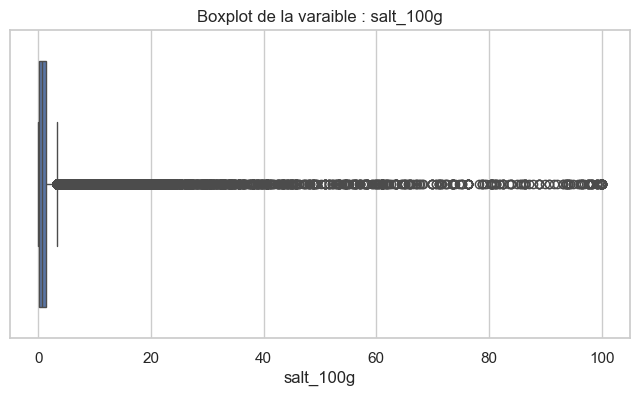

Statistiques de salt_100g:
count    165417.000000
mean          1.300524
std           3.953652
min           0.000000
25%           0.127000
50%           0.716280
75%           1.400000
max         100.000000
Name: salt_100g, dtype: float64
nombre de valeur outliers : 9188
----------------------------------------------------------------------------------------------------


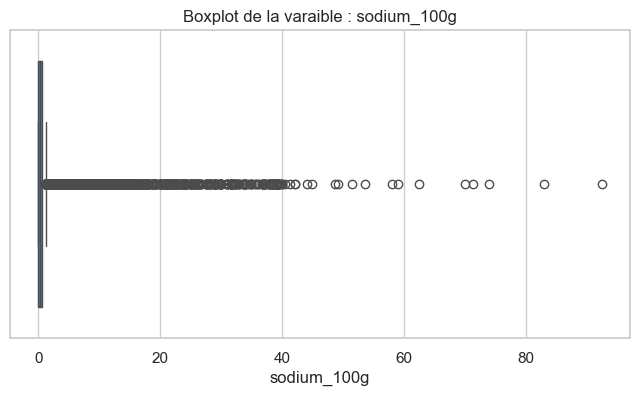

Statistiques de sodium_100g:
count    165440.000000
mean          0.519368
std           1.686083
min           0.000000
25%           0.050000
50%           0.282000
75%           0.551181
max          92.500000
Name: sodium_100g, dtype: float64
nombre de valeur outliers : 9211
----------------------------------------------------------------------------------------------------


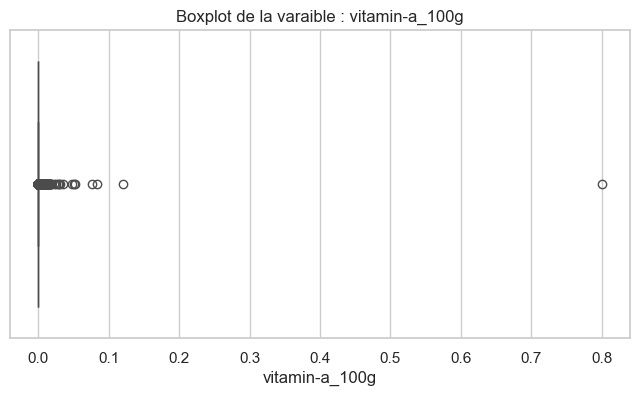

Statistiques de vitamin-a_100g:
count    106182.000000
mean          0.000145
std           0.002580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000102
max           0.800000
Name: vitamin-a_100g, dtype: float64
nombre de valeur outliers : 11991
----------------------------------------------------------------------------------------------------


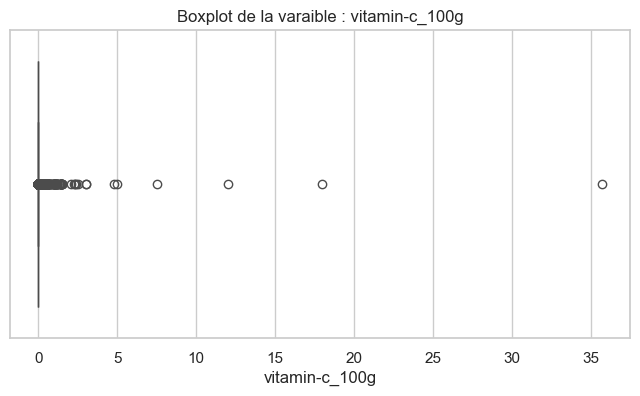

Statistiques de vitamin-c_100g:
count    106845.000000
mean          0.007392
std           0.137101
min           0.000000
25%           0.000000
50%           0.000000
75%           0.002800
max          35.714300
Name: vitamin-c_100g, dtype: float64
nombre de valeur outliers : 17942
----------------------------------------------------------------------------------------------------


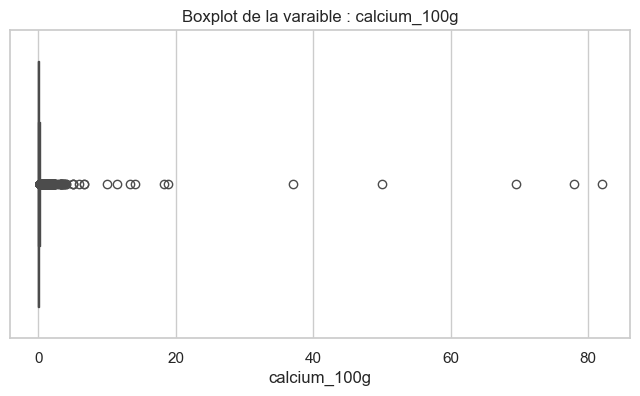

Statistiques de calcium_100g:
count    108856.000000
mean          0.092674
std           0.489390
min           0.000000
25%           0.000000
50%           0.036000
75%           0.105000
max          82.000000
Name: calcium_100g, dtype: float64
nombre de valeur outliers : 7999
----------------------------------------------------------------------------------------------------


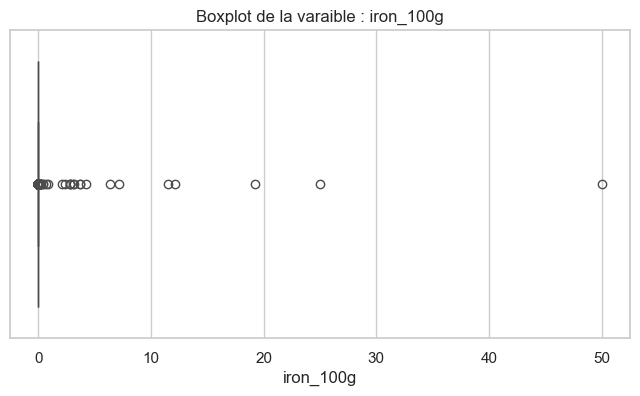

Statistiques de iron_100g:
count    108120.000000
mean          0.003351
std           0.191551
min           0.000000
25%           0.000000
50%           0.001040
75%           0.002400
max          50.000000
Name: iron_100g, dtype: float64
nombre de valeur outliers : 4883
----------------------------------------------------------------------------------------------------


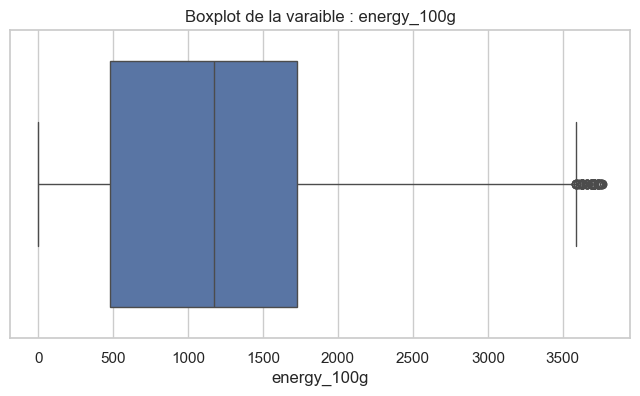

Statistiques de energy_100g:
count    165289.000000
mean       1173.083653
std         737.892975
min           0.000000
25%         481.000000
50%        1176.000000
75%        1724.000000
max        3760.000000
Name: energy_100g, dtype: float64
nombre de valeur outliers : 220
----------------------------------------------------------------------------------------------------


In [74]:
affichage_boxplot_oulier(reste_df,var_numric)

# Etape 3 : Identification et Traitement Des Valeurs Manquantes

<Axes: >

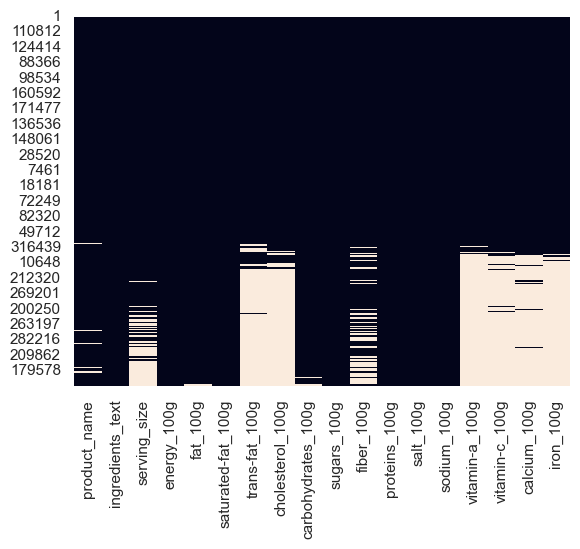

In [77]:
sns.heatmap(reste_df.isna(), cbar = False)

In [79]:
reste_df.isna().mean()*100

product_name           0.744633
ingredients_text       0.000604
serving_size          14.708458
energy_100g            0.178760
fat_100g               0.562249
saturated-fat_100g     0.080925
trans-fat_100g        34.367847
cholesterol_100g      33.409427
carbohydrates_100g     0.574327
sugars_100g            0.085757
fiber_100g            13.493372
proteins_100g          0.080321
salt_100g              0.101458
sodium_100g            0.087568
vitamin-a_100g        35.874626
vitamin-c_100g        35.474228
calcium_100g          34.259746
iron_100g             34.704230
dtype: float64

Dans cet exemple, annot=True ajoute les valeurs numériques sur la carte thermique, cmap='coolwarm' définit la palette de couleurs, fmt='.2f' formate les valeurs avec deux décimales, et linewidths=.5 ( j'étudie la correlation entre les variable pour choisir la methode appropriée) <--> IterativeImputer

<Axes: >

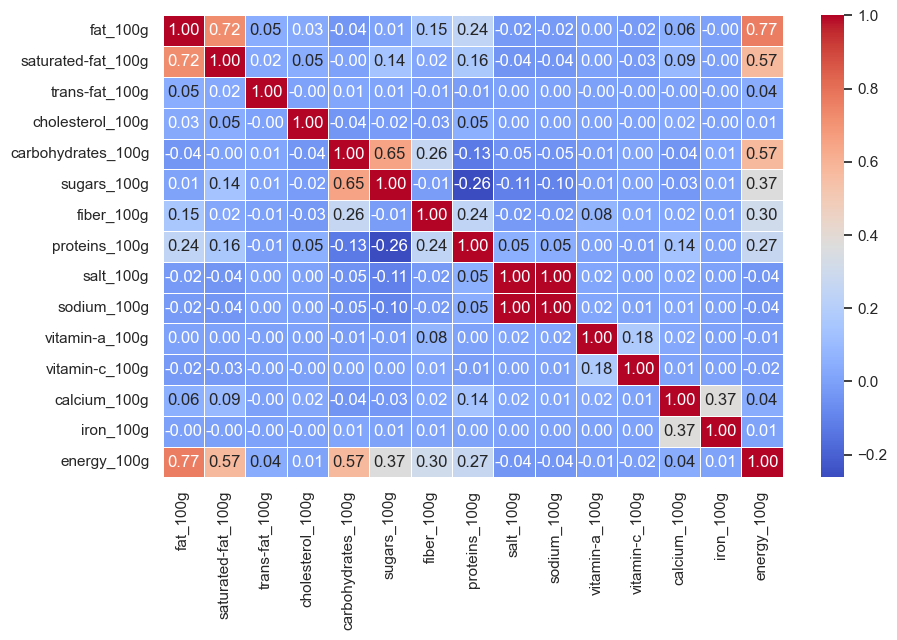

In [82]:
plt.figure(figsize = (10,6))
sns.heatmap(reste_df[var_numric].corr(), annot = True,fmt='.2f', linewidths = .5, cmap='coolwarm')

*les variables salt_100g et sodium_100g semblent redondantes parce qu'elles sont trop corrélées entres-elles ?*
*Une corrélation de 1 (ou très proche de 1) entre deux variables indique qu'elles varient de manière parfaitement proportionnelle, ce qui signifie qu'elles contiennent presque exactement la même information.*

*La variable salt_100g (sel pour 100 g) et soduim_100g (sodium pour 100 g) sont liées chimiquement. En effet :
Le sel (chlorure de sodium) contient du sodium, et ces deux mesures sont donc directement reliées par une relation fixe.*

*Nous observons une corrélation entre les varaibles :
fat_100 <--> (saturated_fat_100g, energie_100g).
saturated_fat_100g <--> (energie_100g, fat_100g).
carbohydrates_100g <--> (sugar_100g, energy_100g).
sugar_100g <--> (carbohydrates_100g).
salt_100g <--> (soduim_100g).
energy_100g <--> (carbohydrates_100g, saturated_fat_100g, fat_100g)*

**Etudion la distribution des variables avant et après avoir imputer les valeurs manquantes (pour comprendre l'impact de l'imputation)**

In [90]:
'''for var in cand_features_pertinentes:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=reste_df[reste_df[var].notna()], x=var, kde=True)
    plt.title(f"Distribution de {var}")
    plt.show()
    '''

'for var in cand_features_pertinentes:\n    plt.figure(figsize=(8, 4))\n    sns.histplot(data=reste_df[reste_df[var].notna()], x=var, kde=True)\n    plt.title(f"Distribution de {var}")\n    plt.show()\n    '

## Imputons les valeur manquantes avec Itérative imputer 

In [100]:
corr_variables = ['fat_100g', 'saturated-fat_100g', 'energy_100g', 'carbohydrates_100g', 'sugars_100g'] # 'salt_100g', 'sodium_100g']

In [102]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [104]:
scaler_imputation = StandardScaler()
reste_df_scaled = scaler_imputation.fit_transform(reste_df[corr_variables])

In [121]:
# j'ai mis max_iter a 30 parce que l'algo ne convergeait pas à 10 et 20 ou les standardisé avant 
impute = IterativeImputer(max_iter = 25, random_state = 0)

si on standardisait les données avant d'imputer les données manquantes

In [109]:
original_index = reste_df.index

In [123]:
arr_imp = impute.fit_transform(reste_df_scaled)

In [125]:
arr_imp = scaler_imputation.inverse_transform(arr_imp)

In [127]:
df_imputed = pd.DataFrame(arr_imp, columns = corr_variables, index = original_index )

In [137]:
# je remaque que l'algo ma predit beaucoups de valeurs négatives
df_imputed.describe()

,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g
count,165585.000000,165585.000000,165585.000000,165585.000000,1.655850e+05
mean,13.128015,4.889811,1175.302146,33.674299,1.559327e+01
std,15.312905,7.206764,741.478423,27.973149,1.980306e+01
min,-25.410977,0.000000,0.000000,-103.249029,-1.776357e-15
25%,1.040000,0.000000,481.000000,7.500000,1.500000e+00
50%,7.690000,1.800000,1176.000000,25.700000,6.000000e+00
75%,21.430000,7.140000,1724.000000,58.700000,2.470000e+01
max,100.000000,100.000000,5017.736599,133.558442,1.000000e+02


In [131]:
df_imputed.head()

,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g
1,28.57,28.57,2243.0,64.29,14.29
116799,35.56,3.33,2138.0,33.33,13.33
116831,1.43,0.00,1552.0,82.86,48.57
116830,1.43,0.00,1552.0,88.57,60.00
116829,10.00,7.14,1552.0,71.43,45.71


In [107]:
# reste_df = reste_df.drop(columns = corr_variables)
# reste_df = pd.concat([reste_df, df_imputed], axis = 1)

In [109]:
# reste_df.shape

(165585, 18)

## Imputation par le KNN imputer

**idée : on peut ameliorer les paramètres du KNNImputer (le paramètre n_neighbors optimal) par le GridSearchCV**

In [157]:
from sklearn.impute import KNNImputer

In [165]:
impute_2 = KNNImputer(n_neighbors = 3)

In [167]:
data_trans = scaler_imputation.fit_transform(reste_df[var_numric])

In [ ]:
array_imputed = scaler_imputation.inverse_transform(impute_2.fit_transform(data_trans))

In [149]:
df_imputed_final = pd.DataFrame(array_imputed, 
                          columns=var_numric, 
                          index=original_index)

KeyboardInterrupt: 

In [224]:
df_imputed_final.describe()

,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g
1,28.57,28.57,2243.0,64.29,14.29,0.00000,0.000
116799,35.56,3.33,2138.0,33.33,13.33,0.67818,0.267
116831,1.43,0.00,1552.0,82.86,48.57,0.47244,0.186
116830,1.43,0.00,1552.0,88.57,60.00,0.50800,0.200
116829,10.00,7.14,1552.0,71.43,45.71,0.32766,0.129


In [ ]:
# reste_df = reste_df.drop(columns = corr_variables)
# reste_df = pd.concat([reste_df, df_imputed], axis = 1)

In [121]:
#!pip install missingno

In [123]:
import missingno as msno

In [125]:
"msno.matrix(df_imputed_final)"

'msno.matrix(df_imputed_final)'

# Les Analyses Univariées et Bivariée 

***Analyse univariée :***
*Étudions chaque variable individuellement pour comprendre sa distribution.
Utilisons des histogrammes, boxplots et graphiques de densité pour les visualiser.
Calculons des statistiques descriptives (moyenne, médiane, écart-type, etc.) pour résumer les données.*

***Analyse bivariée :***
*Étudions les relations entre les variables, notamment entre les features et la cible.
Utilisons des scatter plots, matrices de corrélation et diagrammes de violon pour visualiser les relations.
Identifions les variables corrélées avec la cible mais pas trop entre elles pour éviter la redondance.*

<Axes: >

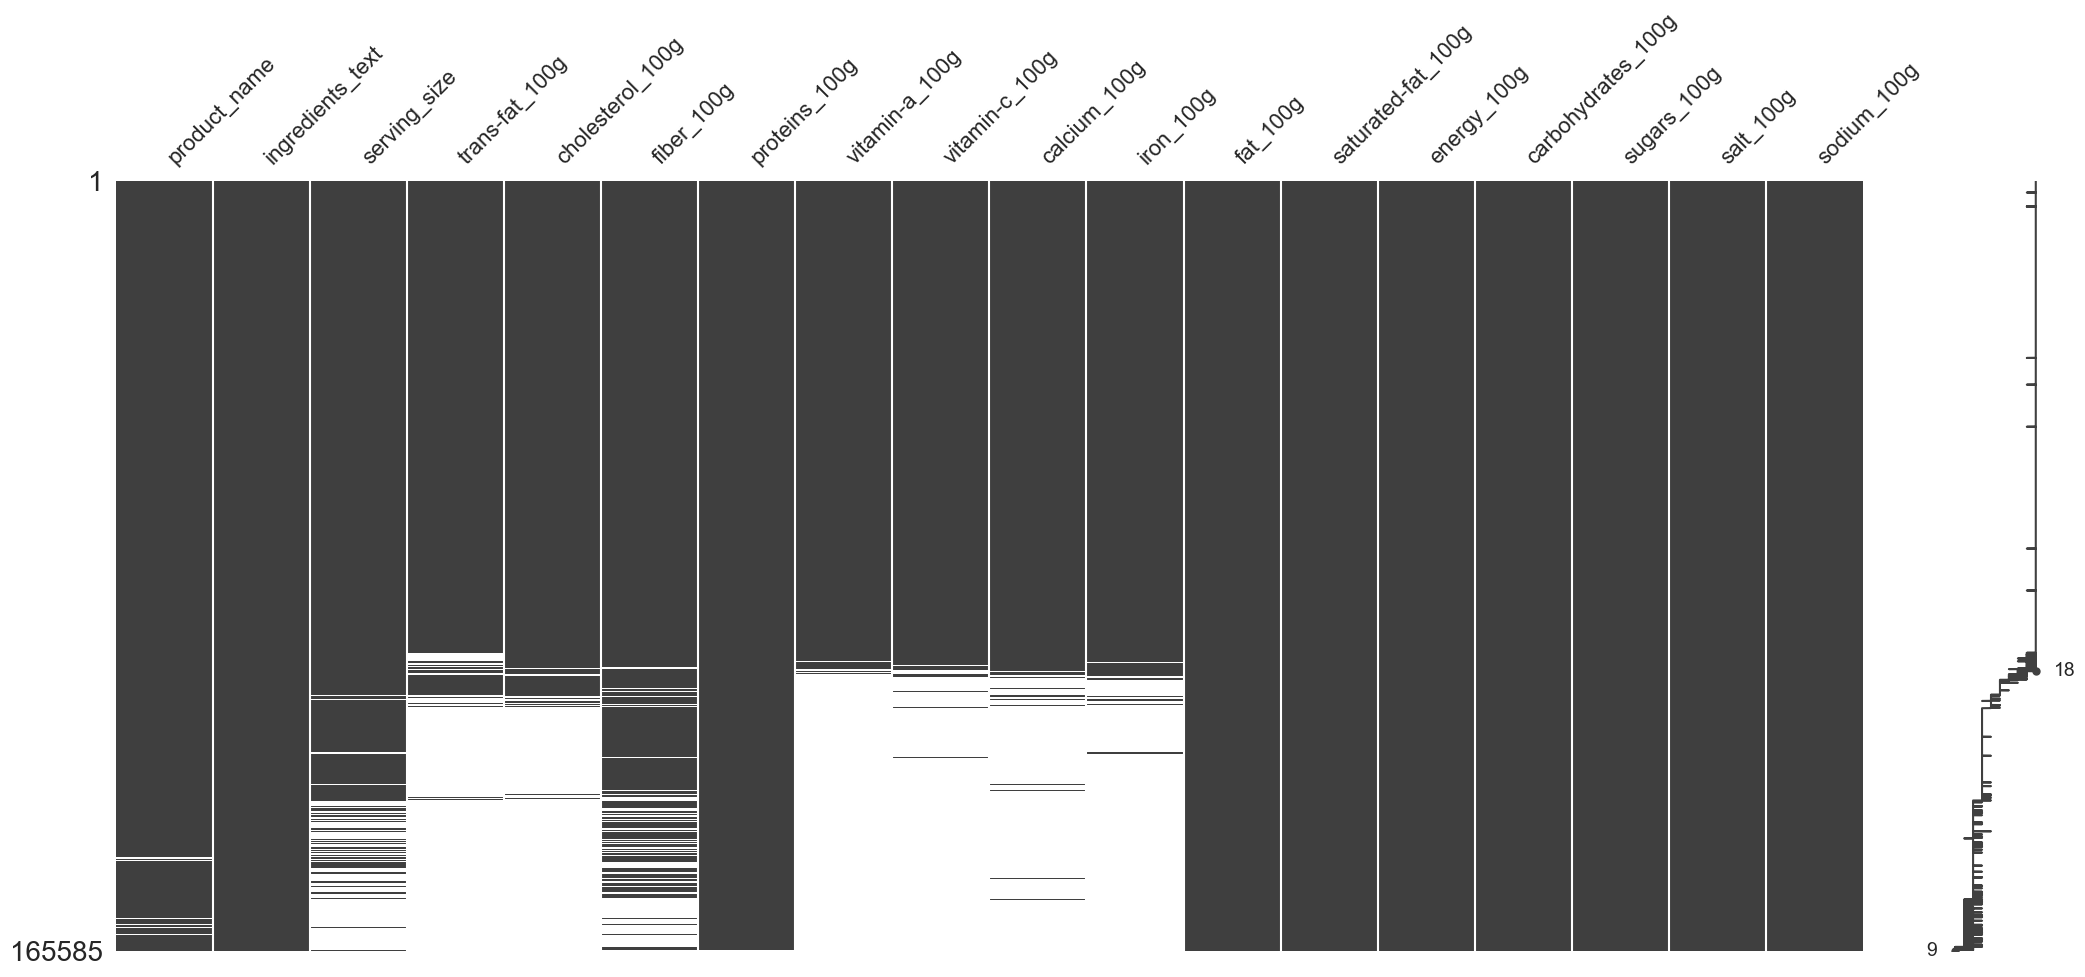

In [129]:
msno.matrix(reste_df)

In [131]:
# moi je pense qu'il fallait pas separer la cible du reste du dataframe ( par ce que les doublons vont rester dans les data de la cible )
# pour séparer le dataset en y et X il fallait juste crée une liste de features qu'on utilisera tout au long de l'étude.
# une autre idée qui me cracace : au niveau des imputation (KNNIterative et IterativeImputer) si je gardais ma variable cible je pense que ça aiderait
# à rendre les algo plus efficace dans la prediction des valeurs manquantes.
print(f'Le nombre de ligne dans reste_df : {reste_df.shape[0]}')
print(f'Alors que le nombre de ligne dans v_cible : {v_cible.shape[0]}')

Le nombre de ligne dans reste_df : 165585
Alors que le nombre de ligne dans v_cible : 221210


In [133]:
var_numric = [ 'fat_100g', 'saturated-fat_100g', 'energy_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g']
reste_df[var_numric].head()

,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g
1,28.57,28.57,2243.0,64.29,14.29,0.00000,0.000
116799,35.56,3.33,2138.0,33.33,13.33,0.67818,0.267
116831,1.43,0.00,1552.0,82.86,48.57,0.47244,0.186
116830,1.43,0.00,1552.0,88.57,60.00,0.50800,0.200
116829,10.00,7.14,1552.0,71.43,45.71,0.32766,0.129


In [135]:
reste_df[var_numric].isnull().sum()

fat_100g              0
saturated-fat_100g    0
energy_100g           0
carbohydrates_100g    0
sugars_100g           0
salt_100g             0
sodium_100g           0
dtype: int64

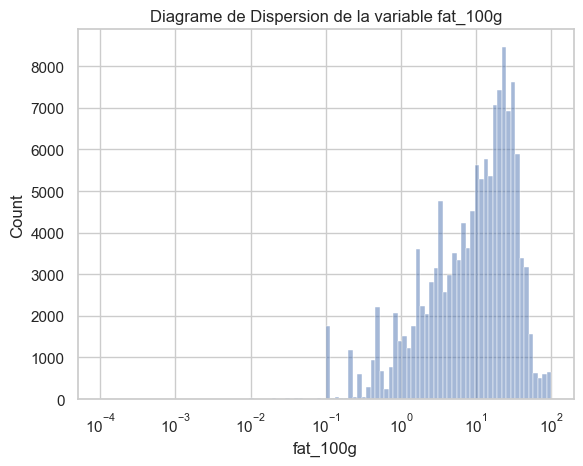

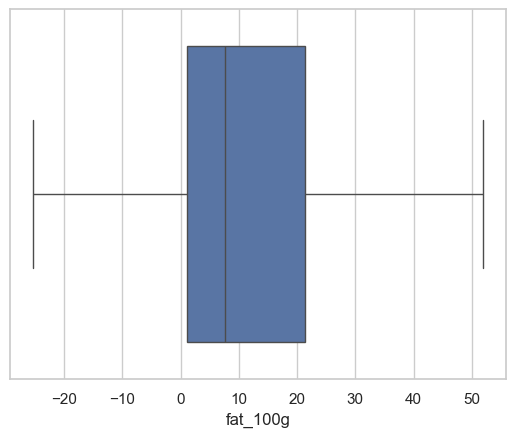

Statistiques de la variable fat_100g:
count    165585.000000
mean         13.127898
std          15.312992
min         -25.438671
25%           1.040000
50%           7.690000
75%          21.430000
max         100.000000
Name: fat_100g, dtype: float64
----------------------------------------------------------------------------------------------------


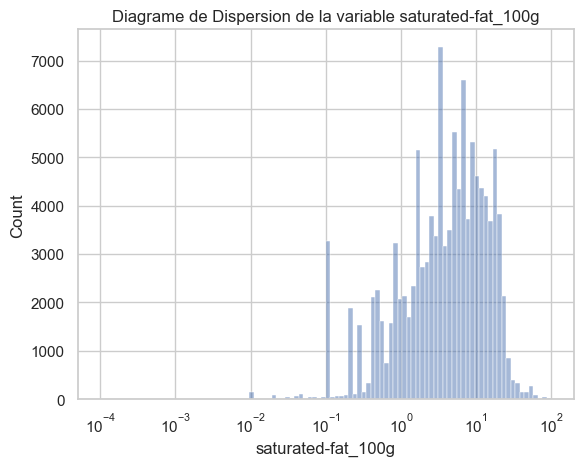

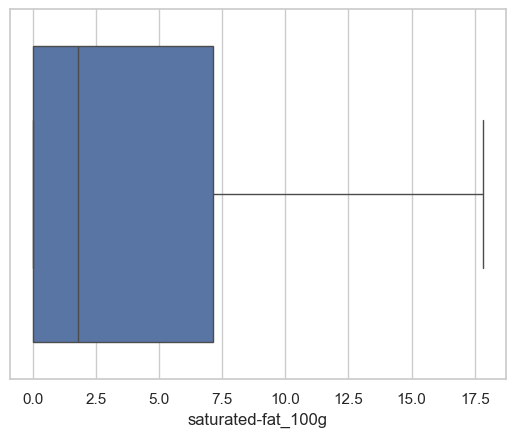

Statistiques de la variable saturated-fat_100g:
count    165585.000000
mean          4.889810
std           7.206764
min           0.000000
25%           0.000000
50%           1.800000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64
----------------------------------------------------------------------------------------------------


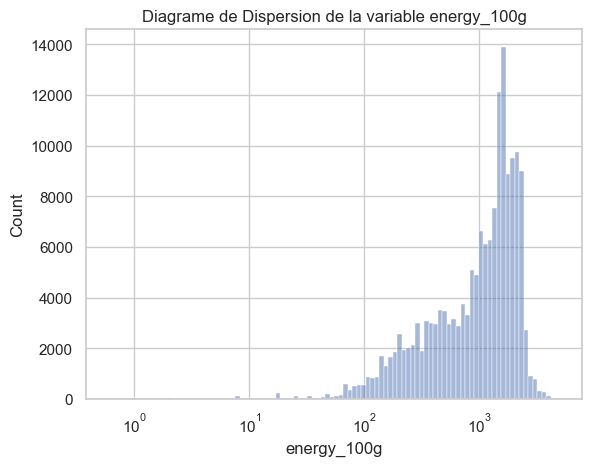

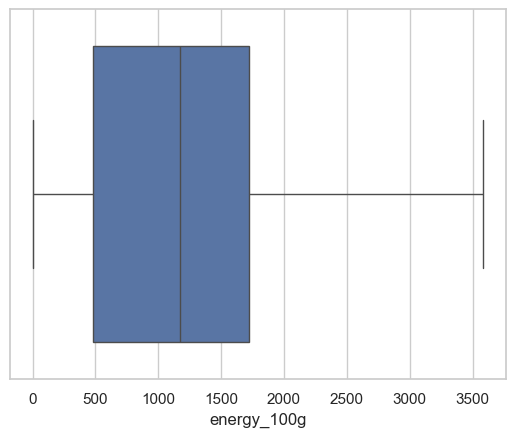

Statistiques de la variable energy_100g:
count    165585.000000
mean       1175.301764
std         741.475259
min           0.000000
25%         481.000000
50%        1176.000000
75%        1724.000000
max        5027.674635
Name: energy_100g, dtype: float64
----------------------------------------------------------------------------------------------------


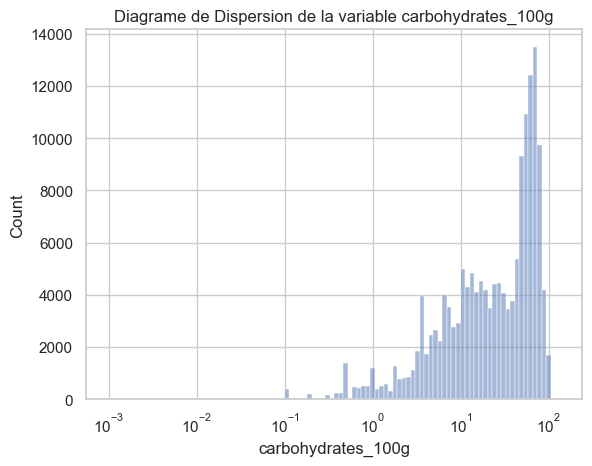

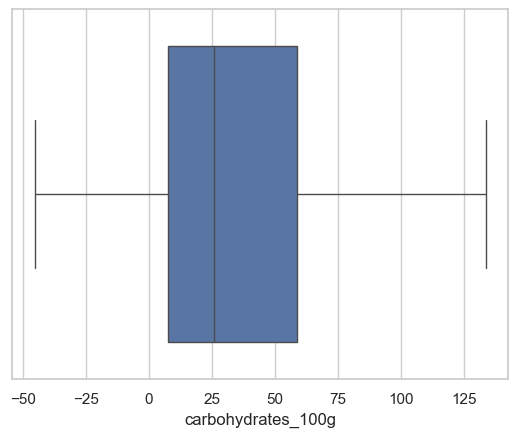

Statistiques de la variable carbohydrates_100g:
count    165585.000000
mean         33.674357
std          27.973064
min        -102.518189
25%           7.500000
50%          25.700000
75%          58.700000
max         133.699574
Name: carbohydrates_100g, dtype: float64
----------------------------------------------------------------------------------------------------


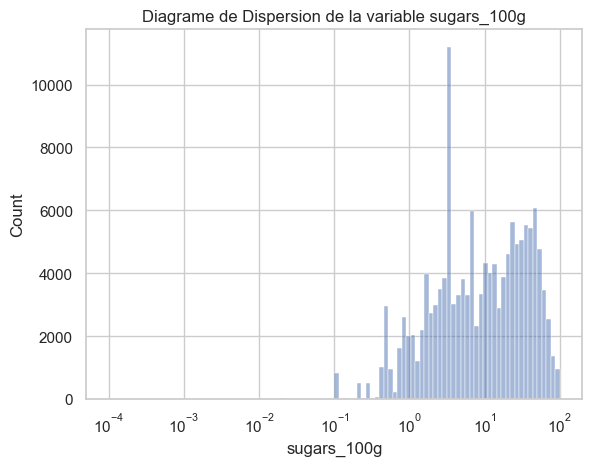

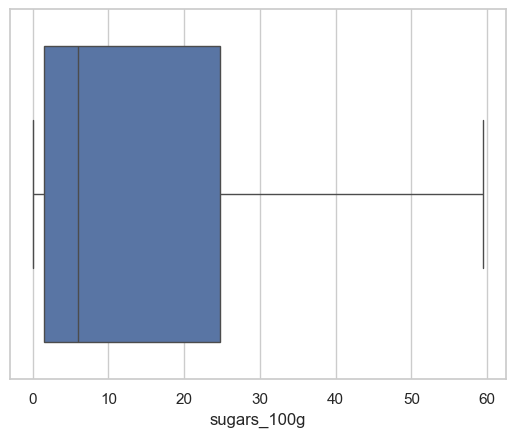

Statistiques de la variable sugars_100g:
count    165585.000000
mean         15.593281
std          19.803070
min           0.000000
25%           1.500000
50%           6.000000
75%          24.700000
max         100.000000
Name: sugars_100g, dtype: float64
----------------------------------------------------------------------------------------------------


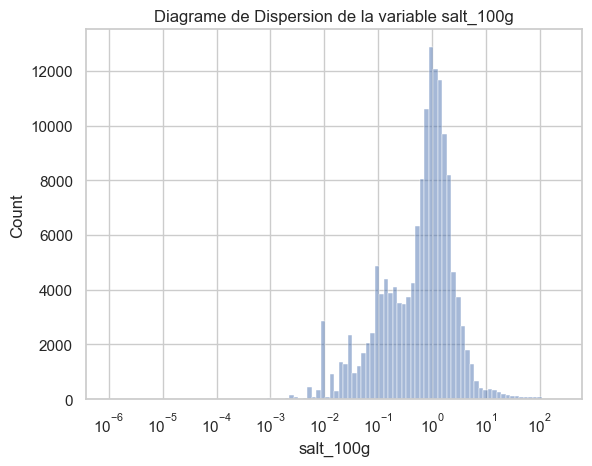

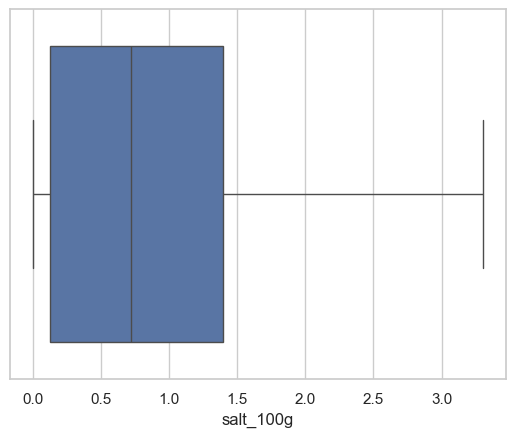

Statistiques de la variable salt_100g:
count    165585.000000
mean          1.319196
std           4.280791
min           0.000000
25%           0.127000
50%           0.718820
75%           1.400000
max         234.950886
Name: salt_100g, dtype: float64
----------------------------------------------------------------------------------------------------


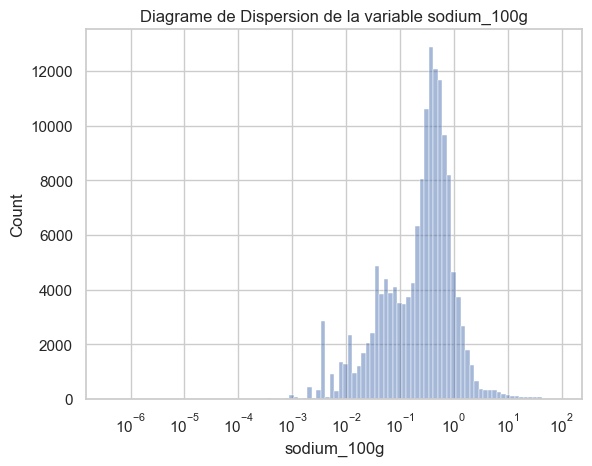

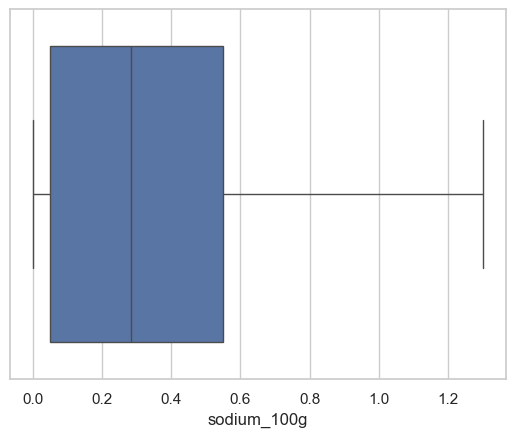

Statistiques de la variable sodium_100g:
count    165585.000000
mean          0.519368
std           1.685344
min           0.000000
25%           0.050000
50%           0.283000
75%           0.551181
max          92.500000
Name: sodium_100g, dtype: float64
----------------------------------------------------------------------------------------------------


In [137]:
for var_num in var_numric : 
    sns.histplot(data= reste_df[var_numric], x= var_num, kde = True, log_scale = True,bins = 100 )
    plt.title(f"Diagrame de Dispersion de la variable {var_num}")
    plt.show()
    sns.boxplot(data= reste_df[var_numric], x= var_num, showfliers = False)
    plt.show()
    #sns.kdeplot(data= reste_df[var_numric], x= var_num)# ou le mettre directement dans le hist avec le param kde = True
    #plt.show()
    # Affichons les statistiques descriptives de la colonne
    print(f"Statistiques de la variable {var_num}:")
    print(reste_df[var_num].describe())
    print('-' * 100)

**Diagrammes de violon :**
Compare une variable numérique avec une variable catégorique (si applicable).
Par exemple : sns.violinplot(data=dataset, x="var_cat", y="var_num").

**Graphiques de dispersion (scatter plots) :**
Étudie les relations entre deux variables continues.
Par exemple : sns.scatterplot(data=dataset, x="var1", y="var2").

In [148]:
reste_df = reste_df.merge(v_cible, left_index=True, right_index=True, how='inner')

In [150]:
reste_df.shape

(165585, 19)

In [152]:
from sklearn.preprocessing import LabelEncoder

on peut utiliser le OneHotEncoder

In [154]:
le = LabelEncoder()
reste_df['cible_encode'] = le.fit_transform(reste_df[cible])

In [156]:
reste_df.head()

,product_name,ingredients_text,serving_size,trans-fat_100g,cholesterol_100g,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition_grade_fr,cible_encode
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.018,3.6,3.57,0.000000,0.0214,0.000,0.00129,28.57,28.57,2243.0,64.29,14.29,0.00000,0.000,d,3
116799,"Almond Protein Snack Bar, Honey Smoked Bbq","Almonds, pumpkin seeds, honey, glucose syrup, ...",45 g (1 BAR),0.0,0.000,6.7,22.22,0.000067,0.0027,0.133,0.00400,35.56,3.33,2138.0,33.33,13.33,0.67818,0.267,c,2
116831,Fruit Bars,"Cherry, apple, chia seeds.",35 g (1 BAR),0.0,0.000,8.6,2.86,0.000000,0.0034,0.057,0.00514,1.43,0.00,1552.0,82.86,48.57,0.47244,0.186,d,3
116830,"Pressed, Fruit Bar, Mango, Apple, Chia","Mango, apple, chia seeds.",35 g (35 g),0.0,0.000,8.6,2.86,0.000343,0.0034,0.171,0.00206,1.43,0.00,1552.0,88.57,60.00,0.50800,0.200,d,3
116829,Pineapple Coconut Chia,"Pineapple, apple, coconut, chia seeds.",35 g (35 g),0.0,0.000,8.6,2.86,0.000000,0.0034,0.057,0.00206,10.00,7.14,1552.0,71.43,45.71,0.32766,0.129,d,3


Corrélation approximative entre 'nutrition_grade_fr' et 'fat_100g': 0.534100681071853


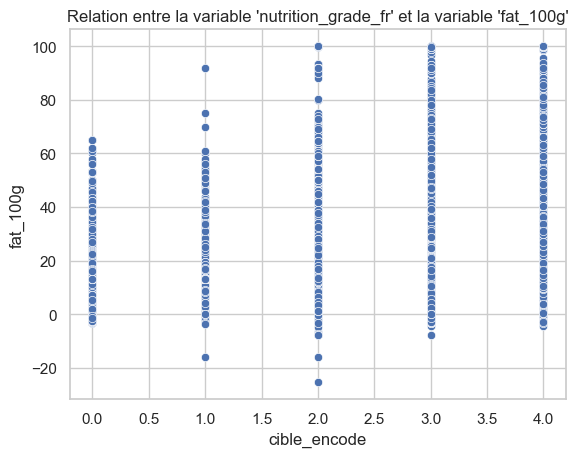

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'saturated-fat_100g': 0.571730749749649


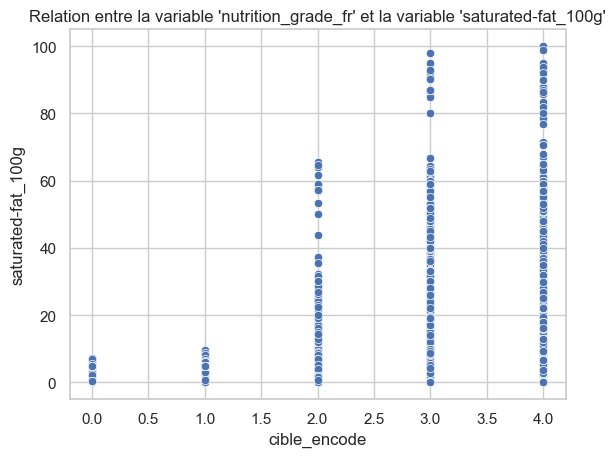

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'energy_100g': 0.594216964514655


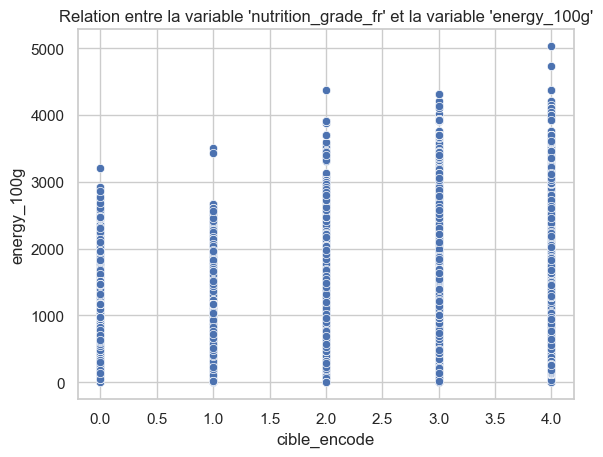

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'carbohydrates_100g': 0.26651015920869775


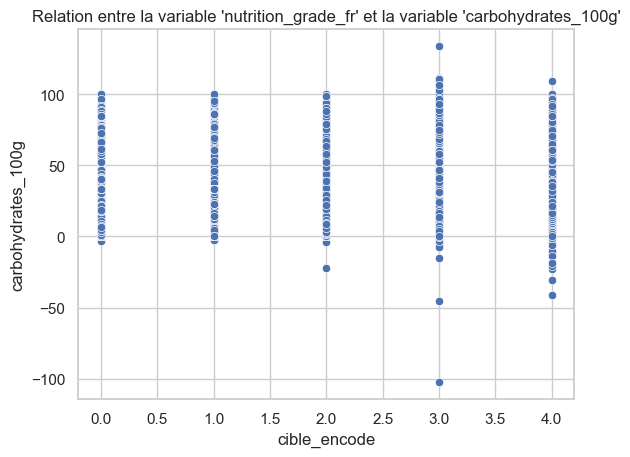

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'sugars_100g': 0.44721866534228755


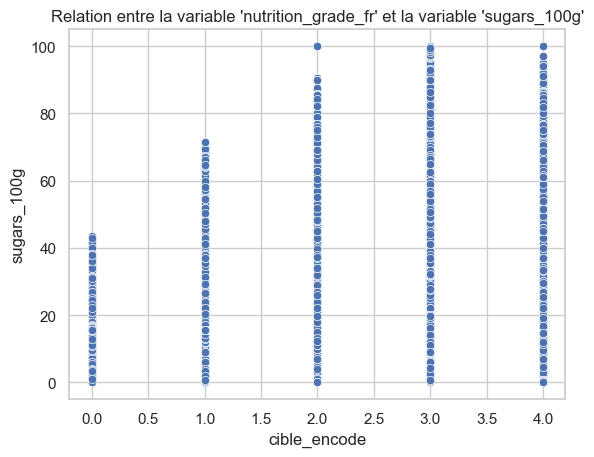

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'salt_100g': 0.09812144675798581


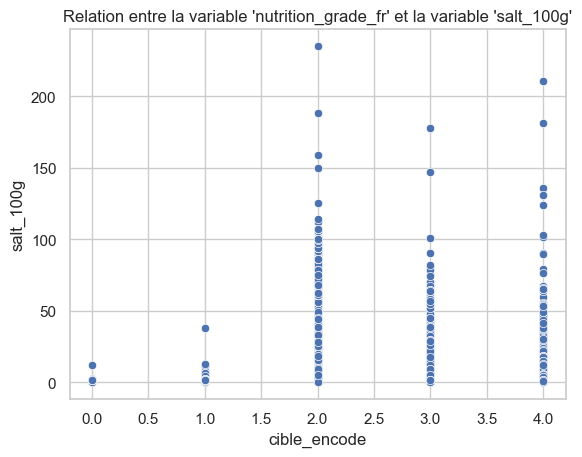

****************************************************************************************************
Corrélation approximative entre 'nutrition_grade_fr' et 'sodium_100g': 0.09812178464552616


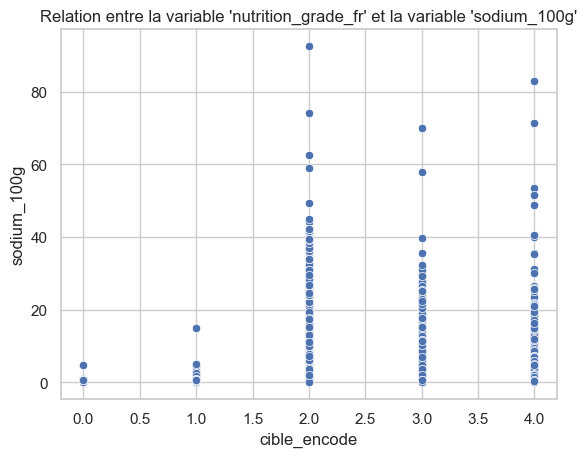

****************************************************************************************************


In [158]:
# Visualisation avec violinplot
for var in var_numric:
    sns.scatterplot(data=reste_df, x='cible_encode', y=var)
    # ou sns.stripplot(data=reste_df, x=cible, y=var, jitter=True) si nous voulons voir tous les points sans supperposition
    plt.title(f"Relation entre la variable '{cible}' et la variable '{var}'")
    
    
    # Calcul de corrélation (approximative avec cible encodée)
    corr_value = reste_df[var].corr(reste_df['cible_encode']) # ou reste_df[[var, cible_encode]].corr()
    print(f"Corrélation approximative entre '{cible}' et '{var}': {corr_value}")
    plt.show()
    print('*'*100)


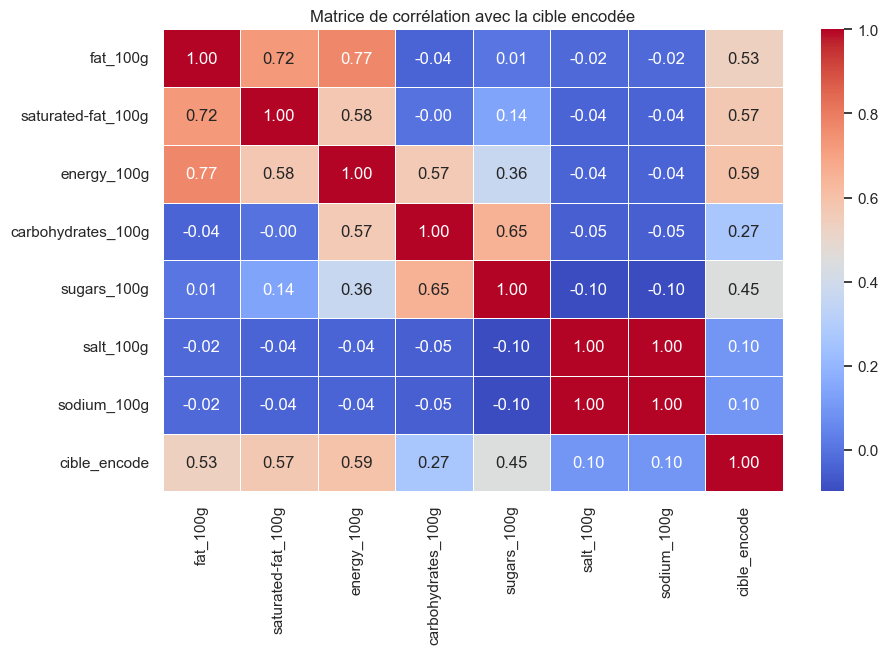

In [160]:
corr_matrix = reste_df[var_numric + ['cible_encode']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True,fmt='.2f', linewidths = .5, cmap='coolwarm')
plt.title("Matrice de corrélation avec la cible encodée")
plt.show() 

# Realisation D'une Analyse Multivariée

## Analyse De Variance ANOVA

Test statistique utilisé pour comparer les moyennes entre plusieurs groupes.
Hypothèse nulle : "Il n'y a pas de différence significative entre les groupes."
Résultat : Si la p-value est petite (ex. < 0.05), il existe une différence significative.

Avant de l’utiliser, il faut vérifier ces hypothèses :

Normalité : Les données dans chaque groupe suivent une distribution normale.
Homogénéité des variances : Les variances des groupes doivent être similaires.
Indépendance : Les observations dans chaque groupe sont indépendantes.

In [162]:
import scipy.stats as stats

In [164]:
for var in var_numric:
    group_A = reste_df[reste_df[cible]=='a'][var]
    group_B = reste_df[reste_df[cible]=='b'][var]
    group_C = reste_df[reste_df[cible]=='c'][var]
    group_D = reste_df[reste_df[cible]=='d'][var]
    #groups = [reste_df[reste_df[cible] == cat][var] for cat in reste_df[cible].unique()] mettre les differents cat dans une liste
    #f_stat, p_value = stats.f_oneway(*groups) et puis eclater la liste en la passant en paramètre
    f_stat, p_value = stats.f_oneway(group_A, group_B, group_C, group_D)
    print(f'Le test ANOVA entre ma variable {var} et les groupe dans ma variable {cible}')
    print(f"Statistique F : {f_stat}")
    if p_value < 0.05:
        print(f"Résultat : Différence significative entre les groupes (p = {p_value} < 0.05)")
    else:
        print(f"Résultat : Aucune différence significative entre les groupes (p = {p_value} >= 0.05)")
    print('*'*100)

Le test ANOVA entre ma variable fat_100g et les groupe dans ma variable nutrition_grade_fr
Statistique F : 10637.67940013887
Résultat : Différence significative entre les groupes (p = 0.0 < 0.05)
****************************************************************************************************
Le test ANOVA entre ma variable saturated-fat_100g et les groupe dans ma variable nutrition_grade_fr
Statistique F : 11642.117790693852
Résultat : Différence significative entre les groupes (p = 0.0 < 0.05)
****************************************************************************************************
Le test ANOVA entre ma variable energy_100g et les groupe dans ma variable nutrition_grade_fr
Statistique F : 18139.44149403507
Résultat : Différence significative entre les groupes (p = 0.0 < 0.05)
****************************************************************************************************
Le test ANOVA entre ma variable carbohydrates_100g et les groupe dans ma variable nutrition_gra

Les résultats obtenus montrent que toutes les variables numériques testées ont une p-value de 0.0, ce qui signifie que les différences entre les groupes de la variable cible (nutrition_grade_fr) sont statistiquement significatives pour chaque variable testée.

Une valeur de F très élevée, indique que les variations entre les groupes sont beaucoup plus importantes que les variations à l'intérieur des groupes. Cela renforce l'idée qu'il existe une différence notable entre les groupes.

In [166]:
# Si l’ANOVA est significative, nous utilisons un test Tukey pour savoir quels groupes sont différents.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [168]:
for var in var_numric :
    tukey = pairwise_tukeyhsd(endog=reste_df[var], groups=reste_df[cible], alpha=0.05)
    print(f'Les groupes spécifiques qui diffèrent dans ma variable {cible} avec ma variable {var}')
    print(tukey)
    print('*'*100)

Les groupes spécifiques qui diffèrent dans ma variable nutrition_grade_fr avec ma variable fat_100g
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     a      b    0.766   0.0  0.4521    1.08   True
     a      c   6.1549   0.0  5.8644  6.4454   True
     a      d  13.9281   0.0 13.6545 14.2017   True
     a      e  23.8502   0.0 23.5543  24.146   True
     b      c   5.3889   0.0  5.1017  5.6761   True
     b      d  13.1621   0.0  12.892 13.4321   True
     b      e  23.0841   0.0 22.7915 23.3767   True
     c      d   7.7732   0.0  7.5308  8.0156   True
     c      e  17.6953   0.0  17.428 17.9625   True
     d      e   9.9221   0.0  9.6733 10.1709   True
---------------------------------------------------
****************************************************************************************************
Les groupes spécifiques qui diffèrent dans ma variable nutrition_grade_

Complétons notre analyse avec des graphiques (par exemple, des boxplots pour chaque variable par groupe) pour visualiser les différences entre les groupes. Cela rendra vos conclusions plus compréhensibles.

## PCA (Analyse en composante Principale)

### PCA avec fanalysis

In [211]:
# installation de fanalysis (qui facilite beaucoups de choses par rapport a scikit-learn comme l'affichage)
#!pip install fanalysis

In [172]:
# importation du package
from fanalysis.pca import PCA
from sklearn.preprocessing import OneHotEncoder

In [174]:
encoder = OneHotEncoder(sparse_output=False)

In [178]:
encoded_array = encoder.fit_transform(reste_df[[cible]])

In [182]:
encoder_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out([cible]))

In [184]:
encoder_df.index = reste_df.index

In [188]:
encoder_df.shape[0]

165585

In [192]:
reste_df = pd.concat([reste_df,encoder_df], axis = 1)

In [196]:
reste_df.head()

,product_name,ingredients_text,serving_size,trans-fat_100g,cholesterol_100g,fiber_100g,proteins_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fat_100g,saturated-fat_100g,energy_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,nutrition_grade_fr,cible_encode,nutrition_grade_fr_a,nutrition_grade_fr_b,nutrition_grade_fr_c,nutrition_grade_fr_d,nutrition_grade_fr_e
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,0.018,3.6,3.57,0.000000,0.0214,0.000,0.00129,28.57,28.57,2243.0,64.29,14.29,0.00000,0.000,d,3,0.0,0.0,0.0,1.0,0.0
116799,"Almond Protein Snack Bar, Honey Smoked Bbq","Almonds, pumpkin seeds, honey, glucose syrup, ...",45 g (1 BAR),0.0,0.000,6.7,22.22,0.000067,0.0027,0.133,0.00400,35.56,3.33,2138.0,33.33,13.33,0.67818,0.267,c,2,0.0,0.0,1.0,0.0,0.0
116831,Fruit Bars,"Cherry, apple, chia seeds.",35 g (1 BAR),0.0,0.000,8.6,2.86,0.000000,0.0034,0.057,0.00514,1.43,0.00,1552.0,82.86,48.57,0.47244,0.186,d,3,0.0,0.0,0.0,1.0,0.0
116830,"Pressed, Fruit Bar, Mango, Apple, Chia","Mango, apple, chia seeds.",35 g (35 g),0.0,0.000,8.6,2.86,0.000343,0.0034,0.171,0.00206,1.43,0.00,1552.0,88.57,60.00,0.50800,0.200,d,3,0.0,0.0,0.0,1.0,0.0
116829,Pineapple Coconut Chia,"Pineapple, apple, coconut, chia seeds.",35 g (35 g),0.0,0.000,8.6,2.86,0.000000,0.0034,0.057,0.00206,10.00,7.14,1552.0,71.43,45.71,0.32766,0.129,d,3,0.0,0.0,0.0,1.0,0.0


In [200]:
# puis on l'instancie ()
pca = PCA(std_unit= True, col_labels=reste_df[var_numric + ['cible_encode']].columns, row_labels=reste_df.product_name)
pca.fit(reste_df[var_numric+['cible_encode']].values)

PCA(col_labels=Index(['fat_100g', 'saturated-fat_100g', 'energy_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'cible_encode'],
      dtype='object'),
    row_labels=1                            Banana Chips Sweetened (Whole)
116799           Almond Protein Snack Bar, Honey Smoked Bbq
116831                                           Fruit Bars
116830               Pressed, Fruit Bar, Mango, Apple, Chia
116829                               Pineapple Coconut Chia
116827                   Honey Roasted Nuts & Sea Sa...
272782                                     All Bran Regular
233777                            Eau de source de montagne
240929                                     Pommes Rissolées
72633                                                   NaN
203294                      Mon atelier salade poulet cæsar
316412                                              오뜨 프로마즈
197404           Mon repas Gerlinéa, crèmes saveur pralinée
225438                     Perle de lait - crème de marrons
313217                     DORITOS GOÛT SWEET CHILLI PEPPER
197186                                   Mon repas Gerlinéa
194210                     Les Crèmes Tradition au Chocolat
200184                 Tranches de filets de colin d'Alaska
Name: product_name, dtype: object)

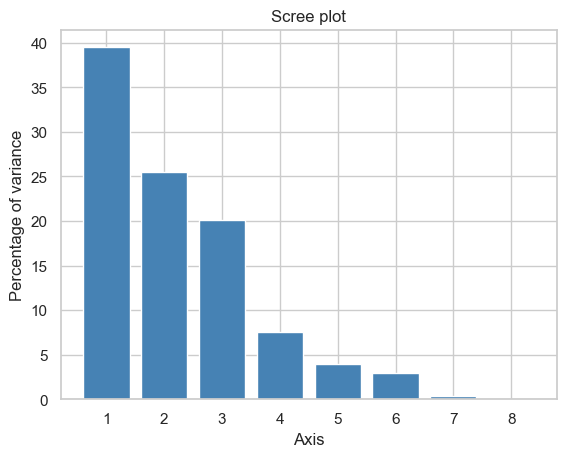

In [204]:
# affichage des composantes 
pca.plot_eigenvalues(type='percentage')

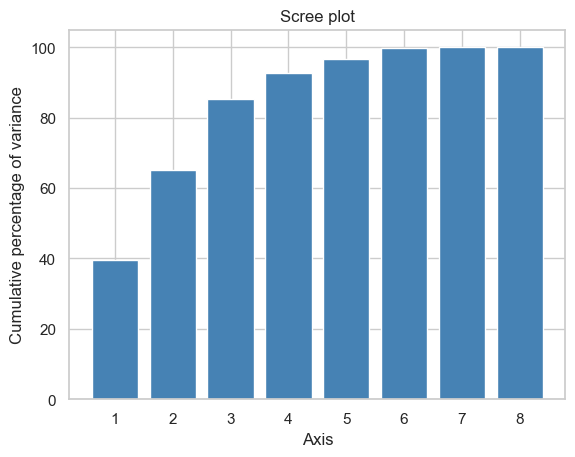

In [206]:
pca.plot_eigenvalues(type='cumulative')

#### Information Sur Les Variables

In [208]:
info_var = pca.col_topandas()

In [216]:
# Coordonnées des var ~ corrélation avec les axes
info_var[['col_coord_dim1', 'col_coord_dim2']]

,col_coord_dim1,col_coord_dim2
fat_100g,-0.770372,0.127762
saturated-fat_100g,-0.750611,0.094980
energy_100g,-0.914205,0.013487
carbohydrates_100g,-0.486661,-0.173167
sugars_100g,-0.525263,-0.200455
salt_100g,0.069860,0.977754
sodium_100g,0.069860,0.977754
cible_encode,-0.803082,0.179471


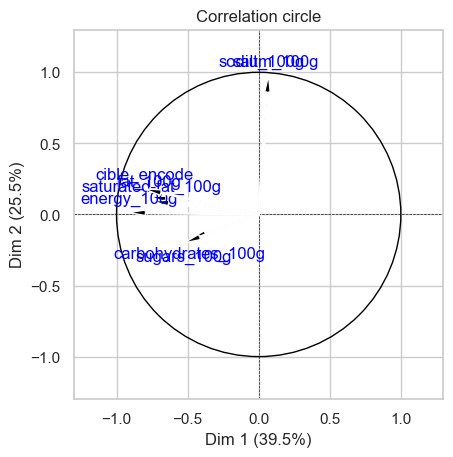

In [218]:
# Cercle de corrélation 
pca.correlation_circle(num_x_axis = 1, num_y_axis = 2) #..